# Introduction to Regression with Neural Networks in Tensorflow

Regression: simply put, predicting a number given an input

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


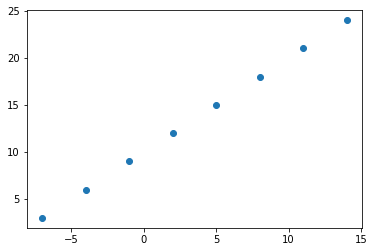

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7., -4, -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input Shapes and Output shapes

Input shape : 1
Output shape : 1

In [4]:
# Create a demo tensor for our housing price prediction problem

X = tf.constant(X)
y = tf.constant(y)

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)
                             ])

model.compile(optimizer='sgd', loss='mean_squared_error')



In [9]:
model.fit(X, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 193ms/step - loss: 82.5518
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 76.8313
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 74.3006
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 71.9628
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 69.7028
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 67.5139
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 65.3938
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 63.3402
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 61.3511
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 59.4245
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 57.5584
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 55.7508
Epoch 13/500
1/1 [=============================

In [10]:
model.predict([10, 5, 12, 17])

array([[19.998615],
       [14.997594],
       [21.999023],
       [27.000046]], dtype=float32)

### Steps in modelling with TensorFlow

1. Create a model - define input and output layers, as well as hidden layers.

2. Compiling a model - define the loss function and the optimizer and evaluation metrics.

3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

## Evaluating our model 

In practice, you'd usually do this:

```
Build the model -> fit -> Evaluate -> Tweak -> Repeat
```



In [24]:
X = tf.range(-100,100,4)
X

#Change it to 10k -10k just to see what effect it has on output

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
y = X + 10
# The pattern we wanted the model to learn 

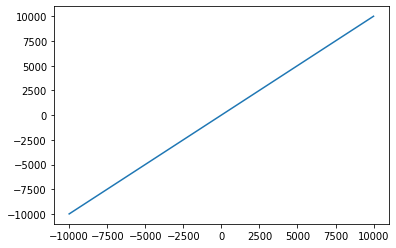

In [7]:
plt.plot(X, y)

In [26]:
# Splitting X and y into training and test sets



X_train, X_test, y_train, y_test = X[:40], X[40:], y[:40], y[40:]


# When you change dataset size to 10k, change to X[:4000], X[4000:] and so on
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

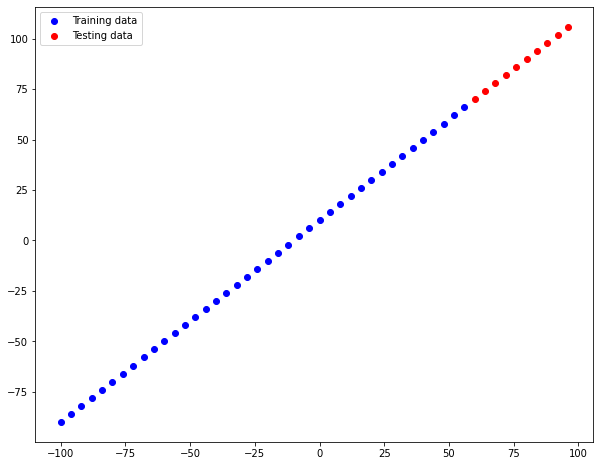

In [27]:
# Visualising the data 

plt.figure(figsize=(10,8))

plt.scatter(X_train, y_train, c="b", label="Training data")

plt.scatter(X_test, y_test, c="r", label="Testing data")

plt.legend()

In [28]:
# Let's have a look at how to build a neural network again 

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.009),
              loss="mean_squared_error")


# Works super well with learning rate as 0.25

In [29]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 18391.5430
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 18140.6562
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 17885.6016
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 17649.7793
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 17419.4961
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 17180.8574
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 16947.5996
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 16727.1445
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 16494.5137
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 16279.7754
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 16058.1562
Epoch 12/100
2/2 [==============================] - 0s 5ms/step - loss: 15833.9609
Epoch 13/100


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total parameters - total number of parameters in the model

* Trainable paramters - there are the parameters the model can update as it trains 

* Non-trainable params - these parameters do not change. Can be the model that you dont want to change when importing it to implement `transfer learning`

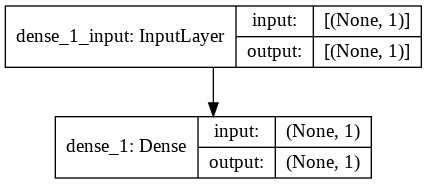

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualising our model's predictions

To visualise predictions, it's agood idea to plot them against the ground truth labels.


In [32]:
y_pred = model.predict(X_test)
y_pred

array([[-16.637814],
       [-17.661263],
       [-18.68471 ],
       [-19.708158],
       [-20.731606],
       [-21.755053],
       [-22.778502],
       [-23.801949],
       [-24.825396],
       [-25.848845]], dtype=float32)

In [33]:
# Let's create a plotting function
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="r", label="Testing Data")
  plt.scatter(test_data, y_pred, c="g", label="Predictions")
  plt.legend();

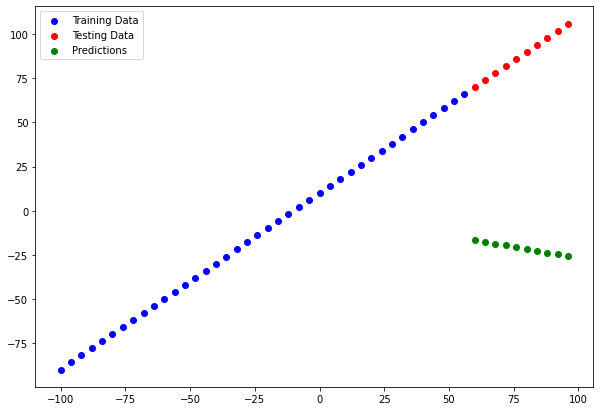

In [34]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

* `mean absolute error`
* `mean square error`
* `Huber` : Combination of mae and mse. It is less sensitive to outliers than mse

In [35]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 58ms/step - loss: 12142.2939


12142.2939453125

In [36]:
tf.metrics.mean_absolute_error(y_pred, y_test)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([104, 105, 106, 107, 108, 109, 110, 111, 112, 113], dtype=int32)>

In [37]:
tf.metrics.mean_squared_error(y_pred, y_test)

<tf.Tensor: shape=(10,), dtype=int32, numpy=
array([10948, 11157, 11368, 11581, 11796, 12013, 12232, 12453, 12676,
       12901], dtype=int32)>

In [38]:
# TO COMPARE TENSORS THEY MUST BE IN THE SAME SHAPE 

In [39]:
tf.metrics.mean_absolute_error(tf.squeeze(y_pred), y_test)

<tf.Tensor: shape=(), dtype=int32, numpy=108>

## A large example

Kaggle Madical Costs Dataset

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
insurance["smoker"].dtype, insurance["sex"].dtype, insurance["age"].dtype

(dtype('O'), dtype('O'), dtype('int64'))

In [16]:
# We will be performing one hot encoding to make all of them numbers

insurance_onehot = pd.get_dummies(insurance)

In [18]:
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]

In [19]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [20]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [56]:
# Creating training and test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape

((1070, 11), (1070,), (268, 11))

In [66]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer="sgd",
    metrics=["mae"]
)

In [67]:
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7773 - mae: 7496.7773
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1738 - mae: 7493.1738

In [69]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [70]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

### Improving our NN model

In [78]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                                         #tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

In [79]:
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 10879.9707 - mae: 10879.9707
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7538.6724 - mae: 7538.6724
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7259.3579 - mae: 7259.3579
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7008.2271 - mae: 7008.2271
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6763.3247 - mae: 6763.3247
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6511.8408 - mae: 6511.8408
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6388.1401 - mae: 6388.1401
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6220.3120 - mae: 6220.3120
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6085.1401 - mae: 6085.1401
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5924.1431 - mae: 5924.14

In [80]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3155.3516 - mae: 3155.3516


[3155.3515625, 3155.3515625]

In [93]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

In [94]:
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [95]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3494.5322 - mae: 3494.5322


[3494.5322265625, 3494.5322265625]

Text(0.5, 0, 'epochs')

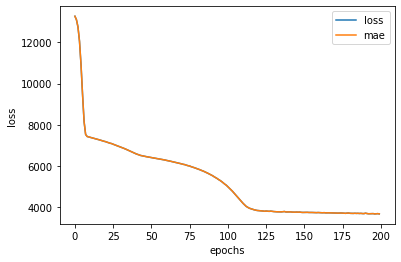

In [96]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalisation and standardisation)

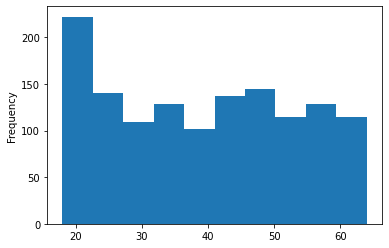

In [98]:
X['age'].plot(kind="hist")

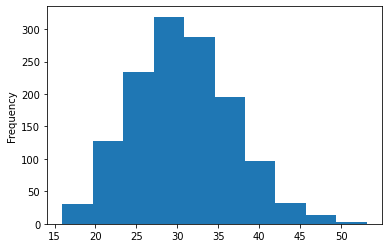

In [99]:
X["bmi"].plot(kind="hist")

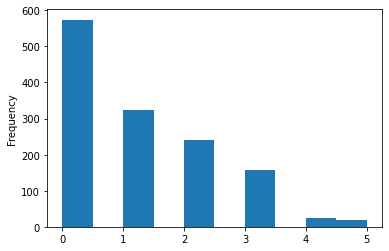

In [100]:
X["children"].plot(kind="hist")

In [102]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex', 'smoker','region'])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [108]:
insurance_model_2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                120       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [110]:
insurance_model_4 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)

insurance_model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.5684 - mae: 13342.5684
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13331.3096 - mae: 13331.3096
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13305.1465 - mae: 13305.1465
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13253.1191 - mae: 13253.1191
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13164.3955 - mae: 13164.3955
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13028.3330 - mae: 13028.3330
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12834.8066 - mae: 12834.8066
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12573.8555 - mae: 12573.8555
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12235.4053 - mae: 12235.4053
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11818.68

In [114]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3436.8491 - mae: 3436.8491


[3436.84912109375, 3436.84912109375]